In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import matplotlib.ticker as tkr
import seaborn as sns
import scipy

## Reading data

In [2]:
data_rna = pd.read_csv('../summary_data/sbt_features_tcga-luad_rna.csv')
data_wxs = pd.read_csv('../summary_data/sbt_features_tcga-luad_wxs.csv')
data_merged = data_rna.merge(data_wxs, on='Sample ID', suffixes=['_rna', '_wxs'])

In [3]:
feature_dict_names = {'mtDNA_dosage_norm':'mtDNA copy number', '5S_norm':'5S rDNA copy number', 
                      '18S_norm':'18S rDNA copy number', '28S_norm':'28S rDNA copy number', 
                      '45S_norm':'45S rDNA copy number', '5S_dosage_norm':'5S rDNA copy number', 
                      '18S_dosage_norm':'18S rDNA copy number', '28S_dosage_norm':'28S rDNA copy number', 
                      '45S_dosage_norm':'45S rDNA copy number','n_fungi_norm':'fungal load', 
                      'n_microbial_norm':'microbial load', 'n_protozoa_norm':'protozoa load', 
                      'n_viral_norm':'viral load', 'loadIG_ligth_chain_norm':'IG κ and λ infiltration', 
                      'loadIG_norm':'BCR infiltration', 'loadIGH_norm':'IGH infiltration', 
                      'loadIGK_norm':'IG κ infiltration', 'loadIGL_norm':'IG λ infiltration', 
                      'loadTCR_norm':'T cell infiltration', 'loadTCRA_norm':'T cell α infiltration', 
                      'loadTCRB_norm':'T cell β infiltration', 'loadTCRD_norm':'T cell δ infiltration',
                      'loadTCRG_norm':'T cell γ infiltration', 'nIG_ligth_chain_norm':'IG κ and λ richness', 
                      'nIG_norm':'BCR richness', 'nIGH_norm':'IGH richness', 'nIGK_norm':'IG κ richness', 
                      'nIGL_norm':'IG λ richness', 'nTCR_norm':'TCR richness', 'nTCRA_norm':'TCR α richness', 
                      'nTCRB_norm':'TCR β richness', 'nTCRD_norm':'TCR δ richness', 'nTCRG_norm':'TCR γ richness',
                      'alphaIGH':'IGH Shannon', 'alphaIGK':'IG κ Shannon', 'alphaIGL':'IG λ Shannon', 
                      'alphaTCRA':'TCR α Shannon', 'alphaTCRB':'TCR β Shannon', 'alphaTCRD':'TCR δ Shannon', 
                      'alphaTCRG':'TCR γ Shannon'}

# Figure S2

(0.6061519365256738, 2.1892209458642772e-44)


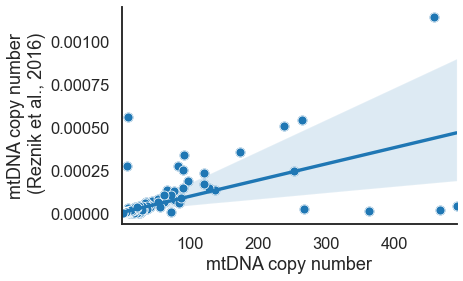

In [4]:
correlated = pd.read_csv('../summary_data/ELife_mtDNA.csv')
correlated = correlated.loc[correlated['Data Type'] == "WXS",]
correlated = correlated[['Sample ID','Study','Tumor MTDNA Copy Number']]
correlated = correlated.rename(columns={"Sample ID": "Sample ID Resnik"}, errors="raise")

data_wxs['Sample ID Resnik'] = data_wxs['Sample ID'].str[5:-4]
data_wxs['Cancer type'] = 'LUAD'

data = data_wxs.merge(correlated, left_on=['Sample ID Resnik','Cancer type'], right_on=['Sample ID Resnik','Study'],  suffixes=(False, False))


sns.set_style("white")
sns.set_context("talk")

sns.regplot(x="mtDNA_dosage_norm", y="Tumor MTDNA Copy Number", data=data)

g = sns.scatterplot(x="mtDNA_dosage_norm", y="Tumor MTDNA Copy Number", data=data)

print(scipy.stats.pearsonr(data["mtDNA_dosage_norm"],data["Tumor MTDNA Copy Number"]))

g.set(xlabel=feature_dict_names['mtDNA_dosage_norm'], ylabel=feature_dict_names['mtDNA_dosage_norm']+'\n (Reznik et al., 2016)')

sns.despine()

plt.savefig("../figures/FigS2_correlation_mtDNA.png", bbox_inches="tight")
